<a href="https://colab.research.google.com/github/rosanahjk/testPublico/blob/main/nivel_5_desaf_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Selecciona un conjunto de datos y describe el objetivo de aplicar técnicas de clasificación o regresión. Define cuál será la variable objetivo.
    2) Identifica y selecciona las variables más importantes. Limpia el conjunto de datos y, si es necesario, genera nuevas variables para enriquecer el análisis. Prepara los datos para llevar a cabo el experimento.
    3) Implementa al menos dos modelos de ML y calcula métricas relevantes para evaluar su rendimiento.
    4) Elabora un breve informe con tus conclusiones. Determina cuál modelo se ajusta mejor y discute las implicaciones de utilizar este modelo en particular.
OBS: Se recomienda buscar el dataset en este sitio web

# acerca del dataset
La obesidad es una enfermedad grave y crónica con interacciones genéticas y ambientales. Se define como una cantidad excesiva de tejido graso en el cuerpo que es perjudicial para la salud. Los principales factores de riesgo de la obesidad incluyen los hábitos sociales, psicológicos y alimentarios. La obesidad es un problema de salud importante para todos los grupos de edad en el mundo. Actualmente, más de 2 mil millones de personas en todo el mundo
 son obesas o tienen sobrepeso.

 Target =  identificar a las personas en riesgo de obesidad

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm




subir el archivo al entorno de colab

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Obesity_Dataset.xlsx to Obesity_Dataset.xlsx


In [4]:
file_key = 'Obesity_Dataset.xlsx'  # Replace for corresponding key
df = pd.read_excel(file_key)

# revisar / explorar los datos

In [5]:
# visualizar dataset

df.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [6]:
# ver las dimenciones

dimencion= df.shape

# mirar las columnas
Colum= df.columns

print("dimencion: ", dimencion)
print("\n")
print("columnas: ", Colum)

dimencion:  (1610, 15)


columnas:  Index(['Sex', 'Age', 'Height', 'Overweight_Obese_Family',
       'Consumption_of_Fast_Food', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals', 'Smoking',
       'Liquid_Intake_Daily', 'Calculation_of_Calorie_Intake',
       'Physical_Excercise', 'Schedule_Dedicated_to_Technology',
       'Type_of_Transportation_Used', 'Class'],
      dtype='object')


In [7]:
# ver si hay duplicados
df.duplicated().sum()

0

In [8]:
# ver info del df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64
 12  Schedule_Dedicated_t

In [9]:
# eliminar espacios en blanco
# Aplicar str.strip() a todas las columnas de tipo string
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Eliminar espacios en blanco en los nombres de las columnas
df.columns = df.columns.str.strip()






In [10]:
# Convertir todas las columnas a categóricas, porque quiero tratarlas como categoria
df = df.astype('category')

# Convertir las columnas a mantener como numéricas a 'int64' (ajusta el tipo según tus necesidades)
df[['Age', 'Height']] = df[['Age', 'Height']].astype('int64')

In [11]:
# @title
 # obtenemos lista de valores únicos o un array(matriz) de cada columna, o sea los valores distintos que aparecen en cada columna
for column in df.columns:
    unique_values = df[column].unique()
    total_unique = len(unique_values)
    print(f"En la columna '{column}':")
    print(unique_values)
    print(f"Total de valores únicos: {total_unique}\n")

En la columna 'Sex':
[2, 1]
Categories (2, int64): [1, 2]
Total de valores únicos: 2

En la columna 'Age':
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54]
Total de valores únicos: 37

En la columna 'Height':
[155 158 159 162 165 176 152 163 166 181 153 156 157 160 161 164 168 169
 171 175 177 178 174 170 167 172 173 151 154 179 182 186 180 184 183 187
 191 185 188 150 190 193]
Total de valores únicos: 42

En la columna 'Overweight_Obese_Family':
[2, 1]
Categories (2, int64): [1, 2]
Total de valores únicos: 2

En la columna 'Consumption_of_Fast_Food':
[2, 1]
Categories (2, int64): [1, 2]
Total de valores únicos: 2

En la columna 'Frequency_of_Consuming_Vegetables':
[3, 2, 1]
Categories (3, int64): [1, 2, 3]
Total de valores únicos: 3

En la columna 'Number_of_Main_Meals_Daily':
[1, 2, 3]
Categories (3, int64): [1, 2, 3]
Total de valores únicos: 3

En la columna 'Food_Intake_Between_Meals':
[3, 1, 2, 4]
Categories (4, int6

In [12]:
# Revisión de valores nulos en df

print("Valores nulos en df:")
print(df.isnull().sum())
print("\n")

# Eliminar espacios en blanco o tabuladores en los nombres de las columnas
df.columns = df.columns.str.strip()



Valores nulos en df:
Sex                                  0
Age                                  0
Height                               0
Overweight_Obese_Family              0
Consumption_of_Fast_Food             0
Frequency_of_Consuming_Vegetables    0
Number_of_Main_Meals_Daily           0
Food_Intake_Between_Meals            0
Smoking                              0
Liquid_Intake_Daily                  0
Calculation_of_Calorie_Intake        0
Physical_Excercise                   0
Schedule_Dedicated_to_Technology     0
Type_of_Transportation_Used          0
Class                                0
dtype: int64




In [13]:

# HACER LOS MAPS
sex = {
    1: 'Female',
    2: 'Male'}

df['Sex'] = df['Sex'].map(sex)

over={
    1: 'Yes',
    2: 'No'}

df['Overweight_Obese_Family'] = df['Overweight_Obese_Family'].map(over)

fast={
    1: 'Yes',
    2: 'No'}

df['Consumption_of_Fast_Food'] = df['Consumption_of_Fast_Food'].map(fast)

veg={
    1: 'Rarely ',
    2: 'Sometimes ',
    3: 'Always'}

df['Frequency_of_Consuming_Vegetables'] = df['Frequency_of_Consuming_Vegetables'].map(veg)

main={
    1: '1-2',
    2: '3',
    3: '3+'}

df['Number_of_Main_Meals_Daily'] = df['Number_of_Main_Meals_Daily'].map(main)

inges_alim_map={
    1: 'Rarely ',
    2: 'Sometimes ',
    3: 'Usually',
    4: 'Always'}

# reemplazar los valores

df['Food_Intake_Between_Meals'] = df['Food_Intake_Between_Meals'].map(inges_alim_map)

smok={
    1: 'YES',
    2: 'No'}

df['Smoking'] = df['Smoking'].map(smok)

liq={
    1: 'Amount smaller than one liter',
    2: 'Within the range of 1 to 2 liters ',
    3: 'In excess of 2 liters'}

# reemplazar los valores

df['Liquid_Intake_Daily'] = df['Liquid_Intake_Daily'].map(liq)

calor={
    1: 'YES',
    2: 'No'}

df['Calculation_of_Calorie_Intake'] = df['Calculation_of_Calorie_Intake'].map(calor)

pys={
    1: 'No physical activity ',
    2: 'In the range of 1-2 days',
    3: 'In the range of 3-4 days ',
    4:'In the range of 5-6 days ',
    5: 'more than 6 days'}

df['Physical_Excercise'] = df['Physical_Excercise'].map(pys)

tech={
    1: 'Between 0 and 2 hours',
    2: 'Between 0 and 2 hours',
    3: 'Exceeding five hours'}

df['Schedule_Dedicated_to_Technology'] = df['Schedule_Dedicated_to_Technology'].map(tech)

TYPE={
    1: 'Automobile',
    2: 'Motorbike',
    3: 'BIKE ',
    4:'Public transportation',
    5: 'Walking'}

df['Type_of_Transportation_Used'] = df['Type_of_Transportation_Used'].map(TYPE)

Class={
    1: 'Underweight ',
    2: 'Normal ',
    3: 'Overweight',
    4:'Obesity'}

df['Class'] = df['Class'].map(Class)

In [14]:
print(df['Class'].unique())

['Normal ', 'Overweight', 'Obesity', 'Underweight ']
Categories (4, object): ['Underweight ', 'Normal ', 'Overweight', 'Obesity']


In [15]:
print(df.dtypes)  # Verifica los tipos de datos
print("es nulo: ",df.isnull().sum())  # Verifica si hay valores nulos


Sex                                  category
Age                                     int64
Height                                  int64
Overweight_Obese_Family              category
Consumption_of_Fast_Food             category
Frequency_of_Consuming_Vegetables    category
Number_of_Main_Meals_Daily           category
Food_Intake_Between_Meals            category
Smoking                              category
Liquid_Intake_Daily                  category
Calculation_of_Calorie_Intake        category
Physical_Excercise                   category
Schedule_Dedicated_to_Technology       object
Type_of_Transportation_Used          category
Class                                category
dtype: object
es nulo:  Sex                                  0
Age                                  0
Height                               0
Overweight_Obese_Family              0
Consumption_of_Fast_Food             0
Frequency_of_Consuming_Vegetables    0
Number_of_Main_Meals_Daily           0
Food_Intake_B

              Counts  Percentage
Class                           
Underweight       73    4.534161
Normal           658   40.869565
Overweight       592   36.770186
Obesity          287   17.826087


<ipython-input-16-9f01a7a74b36>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_class_distribution.index.astype(str), y=df_class_distribution['Counts'], palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:9

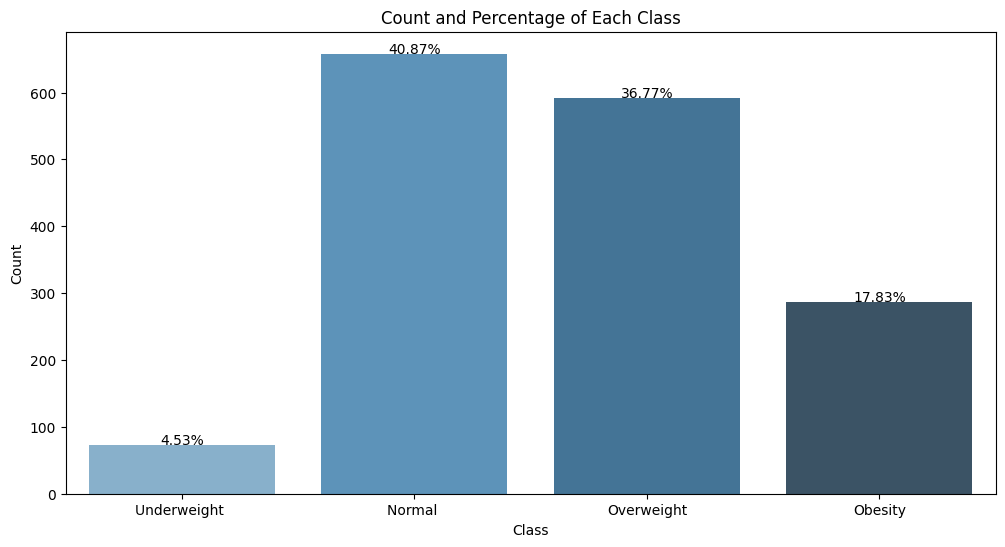

In [16]:
# contar las cantidades de class y ordenar

class_counts = df['Class'].value_counts().sort_index()  #sort_index() en la función value_counts() para asegurar que los valores de las clases se ordenen de manera natural.

# Calcular los porcentajes de cada clase.
class_percentages = (class_counts / class_counts.sum()) * 100

# Crear un DataFrame con las cuentas y los porcentajes.
df_class_distribution = pd.DataFrame({
    'Counts': class_counts,
    'Percentage': class_percentages
})

# Mostrar el DataFrame para verificar que los valores están correctos
print(df_class_distribution)

# Graficar tanto las cuentas como los porcentajes
plt.figure(figsize=(12,6))
sns.barplot(x=df_class_distribution.index.astype(str), y=df_class_distribution['Counts'], palette='Blues_d')

# Añadir los porcentajes sobre las barras
for i in range(len(df_class_distribution)):
    plt.text(i, df_class_distribution['Counts'].iloc[i] + 0.5,
             f'{df_class_distribution["Percentage"].iloc[i]:.2f}%',
             ha='center')

plt.title('Count and Percentage of Each Class')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

# ANáliSIS

In [17]:
#Separamos las variables en numericas y categoricas,
# scalar las numericas
# codifica las categoricas
#Combinar los datos: Concatena los datos numéricos escalados y los datos categóricos codificados en un nuevo DataFrame.
# ¿Por qué codificar? Los algoritmos de aprendizaje automático suelen trabajar con datos numéricos, por lo que es
#necesario convertir las categorías en representaciones numéricas.

In [18]:
# Identificar variables numéricas y categóricas

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object','category']).columns

print("Variables Numéricas:")
print(numerical_cols)

print("\nVariables Categóricas:")
print(categorical_cols)

Variables Numéricas:
Index(['Age', 'Height'], dtype='object')

Variables Categóricas:
Index(['Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
       'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily',
       'Food_Intake_Between_Meals', 'Smoking', 'Liquid_Intake_Daily',
       'Calculation_of_Calorie_Intake', 'Physical_Excercise',
       'Schedule_Dedicated_to_Technology', 'Type_of_Transportation_Used',
       'Class'],
      dtype='object')


In [19]:
# Crear DataFrames para variables numéricas y categóricas
df_numerical = df[numerical_cols]
df_categorical = df[categorical_cols]

scaled

In [20]:
# crear el escalador
scaler = StandardScaler()

# Ajustar el escalador en las variables numéricas y transformar
df_numerical_scaled = scaler.fit_transform(df_numerical)

# Convertir el array resultante a un DataFrame
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=numerical_cols)

encode

In [21]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada columna categórica
df_categorical_encoded = df[categorical_cols].apply(label_encoder.fit_transform)
print(df_categorical_encoded)


      Sex  Overweight_Obese_Family  Consumption_of_Fast_Food  \
0       1                        0                         0   
1       1                        0                         0   
2       1                        0                         0   
3       1                        0                         0   
4       1                        0                         1   
...   ...                      ...                       ...   
1605    1                        0                         1   
1606    1                        0                         1   
1607    1                        1                         0   
1608    1                        0                         1   
1609    1                        1                         1   

      Frequency_of_Consuming_Vegetables  Number_of_Main_Meals_Daily  \
0                                     0                           0   
1                                     0                           0   
2                 

Concatenamos La función pd.concat() en pandas se utiliza para concatenar (o combinar) dos o más DataFrames u objetos similares, como Series, en un solo DataFrame

In [22]:
#Concatenar las variables escaladas y codificadas
df_final = pd.concat([df_numerical_scaled, df_categorical_encoded], axis=1)

# Verificar el DataFrame final
print(df_final.head())

        Age    Height  Sex  Overweight_Obese_Family  Consumption_of_Fast_Food  \
0 -1.537377 -1.597215    1                        0                         0   
1 -1.537377 -1.221152    1                        0                         0   
2 -1.537377 -1.095798    1                        0                         0   
3 -1.537377 -0.719736    1                        0                         0   
4 -1.537377 -0.343673    1                        0                         1   

   Frequency_of_Consuming_Vegetables  Number_of_Main_Meals_Daily  \
0                                  0                           0   
1                                  0                           0   
2                                  2                           0   
3                                  2                           1   
4                                  2                           0   

   Food_Intake_Between_Meals  Smoking  Liquid_Intake_Daily  \
0                          3        0     

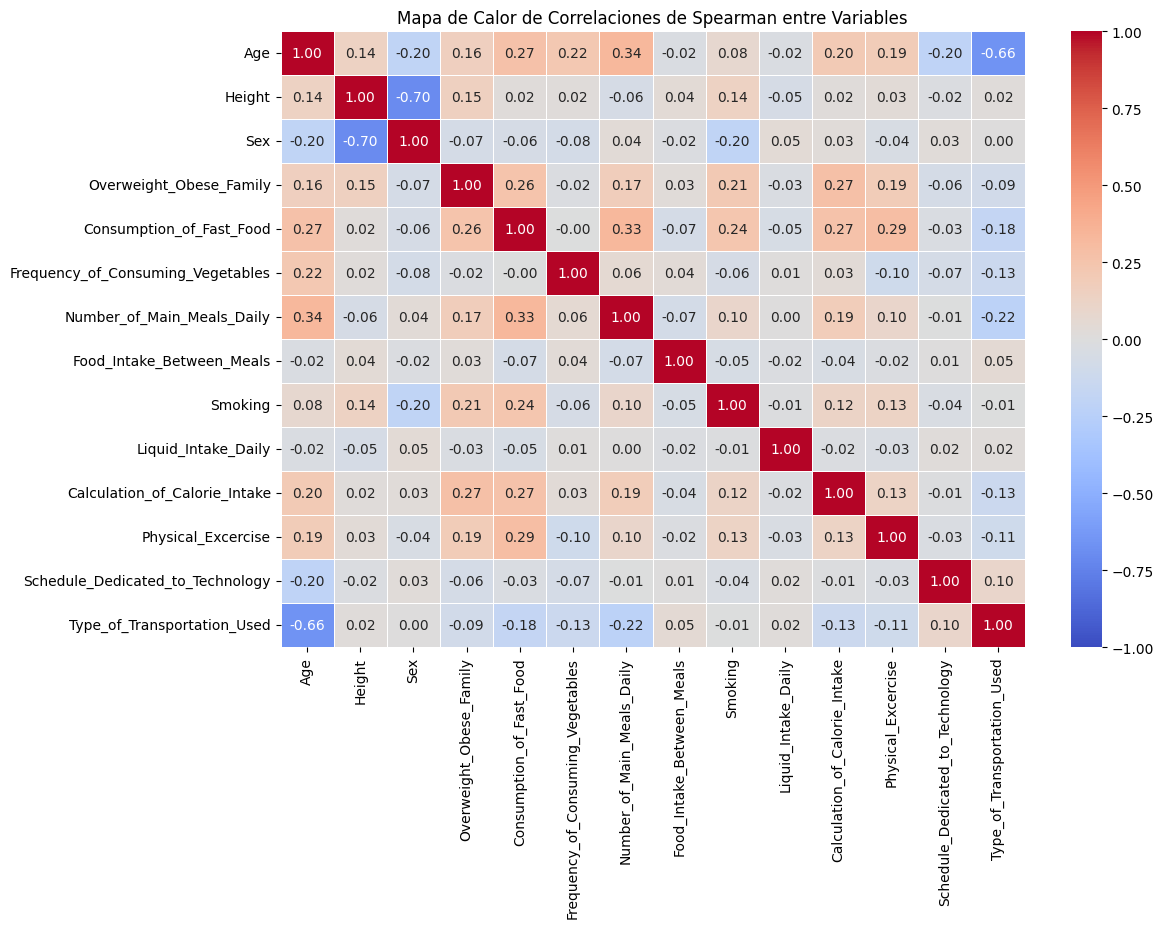

In [23]:
# Excluir la target 'Class' para el cálculo de la matriz de correlación, esto
# es para ver las correlaciones entre variables por la multicolinealidad

df_correlation = df_final.drop(columns=['Class'])

# Calcular la matriz de correlación
corr_matrix = df_correlation.corr(method='spearman')


# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones de Spearman entre Variables')
plt.show()



<Axes: >

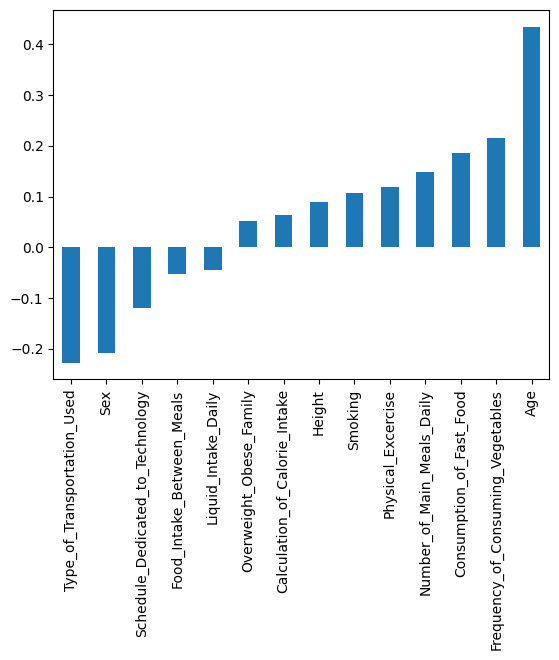

In [24]:
# ver la correlacion con la vaiable target en orden ascendente

df_final.corr()['Class'][:-1].sort_values(ascending=True).plot(kind='bar')

In [25]:
# visulizar el df final

df_final.head()

,Age,Height,Sex,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,-1.537377,-1.597215,1,0,0,0,0,3,0,0,0,1,1,3,0
1,-1.537377,-1.221152,1,0,0,0,0,1,0,0,0,3,1,1,0
2,-1.537377,-1.095798,1,0,0,2,0,3,0,1,0,0,1,3,0
3,-1.537377,-0.719736,1,0,0,2,1,2,0,2,0,3,1,3,0
4,-1.537377,-0.343673,1,0,1,2,0,3,0,0,0,1,1,2,0


Preparamos el dataset para la clasificacion, observamos la columan que se quiere predecir la tarjet 'Class'

# Split data in train and test

Dividimos el conjunto de datos en 80% y 20%

In [26]:
# Definir la semilla para la reproducibilidad
seed = 42

# Sacamos la target que queremos predecir 'Trabaja'
X = df_final.drop(columns=['Class'])  # Variables de entrada
y = df_final['Class']  # Variable objetivo

# Dividir en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Entrenando los modelos Random forest

In [27]:
# Modelo 1: Random Forest
random_model = RandomForestClassifier(random_state=seed)
random_model.fit(X_train, y_train)
rf_train_accuracy = random_model.score(X_train, y_train)
rf_test_accuracy = random_model.score(X_test, y_test)
print(f'Random Forest Train Accuracy: {rf_train_accuracy:.2f}')
print(f'Random Forest Test Accuracy: {rf_test_accuracy:.2f}')

# Modelo 2: Regresión Logística
logist_model = LogisticRegression(random_state=seed, max_iter=1000)  # Añadido max_iter para evitar problemas de convergencia
logist_model.fit(X_train, y_train)
logist_train_accuracy = logist_model.score(X_train, y_train)
logist_test_accuracy = logist_model.score(X_test, y_test)
print(f'Logistic Regression Train Accuracy: {logist_train_accuracy:.2f}')
print(f'Logistic Regression Test Accuracy: {logist_test_accuracy:.2f}')

Random Forest Train Accuracy: 1.00
Random Forest Test Accuracy: 0.86
Logistic Regression Train Accuracy: 0.72
Logistic Regression Test Accuracy: 0.71


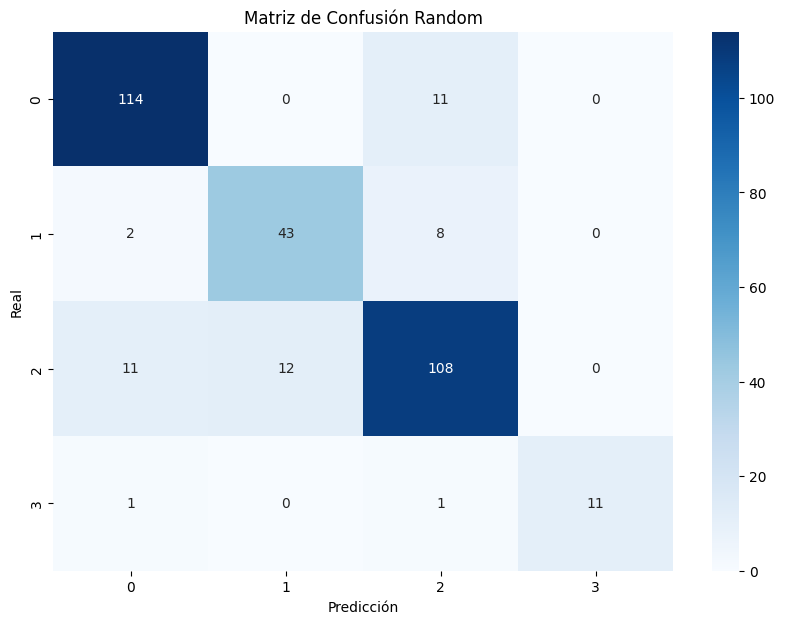

Random Forest Matriz de Confusión:
[[114   0  11   0]
 [  2  43   8   0]
 [ 11  12 108   0]
 [  1   0   1  11]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       125
           1       0.78      0.81      0.80        53
           2       0.84      0.82      0.83       131
           3       1.00      0.85      0.92        13

    accuracy                           0.86       322
   macro avg       0.88      0.85      0.86       322
weighted avg       0.86      0.86      0.86       322



In [28]:
#MAtrices de los modelos 1
# Generar la matriz de confusión y el informe de clasificación para el Random Forest
rf_predictions = random_model.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión Random')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

print("Random Forest Matriz de Confusión:")
print(rf_conf_matrix)
#print("\nRandom Forest Informe de Clasificación:")
print(rf_class_report)



importancia de las caracteristicas


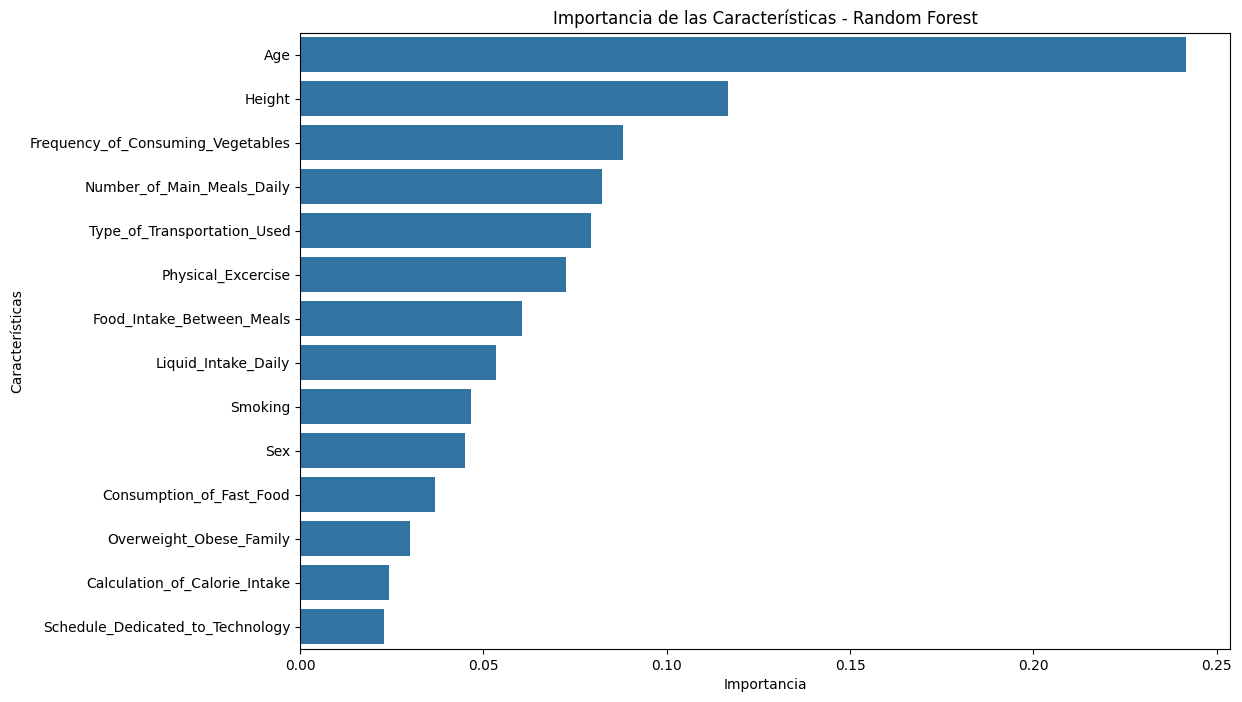

                              Feature  Importance
0                                 Age    0.241568
1                              Height    0.116671
5   Frequency_of_Consuming_Vegetables    0.088017
6          Number_of_Main_Meals_Daily    0.082439
13        Type_of_Transportation_Used    0.079250
11                 Physical_Excercise    0.072517
7           Food_Intake_Between_Meals    0.060638
9                 Liquid_Intake_Daily    0.053422
8                             Smoking    0.046698
2                                 Sex    0.045084
4            Consumption_of_Fast_Food    0.036820
3             Overweight_Obese_Family    0.029826
10      Calculation_of_Calorie_Intake    0.024160
12   Schedule_Dedicated_to_Technology    0.022888


In [29]:
importances = random_model.feature_importances_

# Obtener los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame para organizar las importancias
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar las características por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Mostrar el DataFrame de importancias
print(feature_importance_df)

# Regresion logística

Logistic Regression Train Accuracy: 0.72
Logistic Regression Test Accuracy: 0.71
Matriz de Confusión:
[[104   2  18   1]
 [  2  32  19   0]
 [ 23  19  89   0]
 [  9   0   1   3]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       125
           1       0.60      0.60      0.60        53
           2       0.70      0.68      0.69       131
           3       0.75      0.23      0.35        13

    accuracy                           0.71       322
   macro avg       0.70      0.59      0.61       322
weighted avg       0.71      0.71      0.70       322



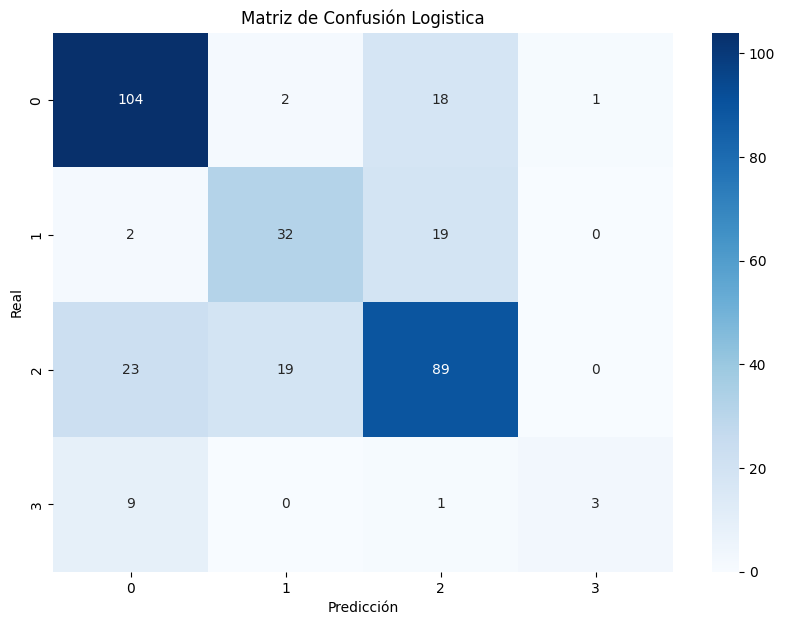

In [30]:
# modelo  2 regresion logístic

# Modelo 2: Regresión Logística
logist_model = LogisticRegression(random_state=seed, max_iter=1000)  # Añadido max_iter para evitar problemas de convergencia
logist_model.fit(X_train, y_train)
logist_train_accuracy = logist_model.score(X_train, y_train)
logist_test_accuracy = logist_model.score(X_test, y_test)
print(f'Logistic Regression Train Accuracy: {logist_train_accuracy:.2f}')
print(f'Logistic Regression Test Accuracy: {logist_test_accuracy:.2f}')

# Hacer predicciones en el conjunto de prueba
y_pred = logist_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print('Matriz de Confusión:')
print(conf_matrix)

# También puedes imprimir el informe de clasificación para obtener más métricas
print('\nInforme de Clasificación:')
print(classification_report(y_test, y_pred))

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión Logistica')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


 Calcular la importancia de las características

In [38]:
# Obtener los coeficientes del modelo
importances1 = logist_model.coef_[0]

# Obtener los nombres de las características
feature_names1 = X_train.columns

# Crear un dataframe para visualizar la importancia de las características

feature_importance_df = pd.DataFrame({
    'Feature': feature_names1,
    'Importance': importances1
})

# Ordenar por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar la importancia de las características
print(feature_importance_df)


                              Feature  Importance
2                                 Sex    0.769536
1                              Height    0.264361
7           Food_Intake_Between_Meals    0.078505
12   Schedule_Dedicated_to_Technology    0.041603
9                 Liquid_Intake_Daily    0.006622
10      Calculation_of_Calorie_Intake    0.004180
11                 Physical_Excercise   -0.026093
13        Type_of_Transportation_Used   -0.191585
3             Overweight_Obese_Family   -0.275388
4            Consumption_of_Fast_Food   -0.421334
5   Frequency_of_Consuming_Vegetables   -0.550332
6          Number_of_Main_Meals_Daily   -0.765696
8                             Smoking   -0.842095
0                                 Age   -1.070867


Segun lo aterior "iquid_Intake_Daily","Calculation_of_Calorie_Intake","Schedule_Dedicated_to_Technology" no siren para explicar el modelo.

```
# Tiene formato de código
```



Using StatsModels library

In [40]:
# vemos que variable suma o es importante
# excluir a las que no aportan

#  columnas con coef muy bajo segun lo visto arriba




X_m = sm.add_constant(X_train)   # agregar constante
cols=['Liquid_Intake_Daily','Calculation_of_Calorie_Intake']

#borrar las columnas cols

X_m = X_m.drop(columns=cols)

# Ajustar el modelo de regresión logística multinomial
multinomial_logit = sm.MNLogit(y_train, X_m)  # en este caso porque es multinomial el Y
results = multinomial_logit.fit()

results.summary()

# ver el Pseudo R-squ.:	0.4554 en este caso significa que los datos explica el 0.45 del modelo

Optimization terminated successfully.
         Current function value: 0.662902
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  Class   No. Observations:                 1288
Model:                        MNLogit   Df Residuals:                     1249
Method:                           MLE   Df Model:                           36
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                  0.4409
Time:                        15:08:00   Log-Likelihood:                -853.82
converged:                       True   LL-Null:                       -1527.0
Covariance Type:            nonrobust   LLR p-value:                1.487e-259
=====================================================================================================
                          Class=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -5.6976      0.616     -9.255      0.000      -6.904      -4.491
Age                                   2.3812      0.214     11.117      0.000       1.961       2.801
Height                               -0.3861      0.175     -2.212      0.027      -0.728      -0.044
Sex                                  -2.0285      0.364     -5.569      0.000      -2.742      -1.315
Overweight_Obese_Family               1.7080      0.340      5.031      0.000       1.043       2.373
Consumption_of_Fast_Food              1.3538      0.307      4.407      0.000       0.752       1.956
Frequency_of_Consuming_Vegetables     1.2610      0.181      6.951      0.000       0.905       1.617
Number_of_Main_Meals_Daily            2.9680      0.262     11.342      0.000       2.455       3.481
Food_Intake_Between_Meals            -0.2087      0.122     -1.706      0.088      -0.448       0.031
Smoking                               1.4396      0.277      5.198      0.000       0.897       1.982
Physical_Excercise                   -0.0797      0.090     -0.886      0.376      -0.256       0.097
Schedule_Dedicated_to_Technology      0.6296      0.296      2.126      0.033       0.049       1.210
Type_of_Transportation_Used           0.2994      0.109      2.751      0.006       0.086       0.513
-----------------------------------------------------------------------------------------------------
                          Class=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.1724      0.366     -0.470      0.638      -0.891       0.546
Age                                   2.0712      0.173     12.004      0.000       1.733       2.409
Height                               -0.1667      0.131     -1.275      0.202      -0.423       0.089
Sex                                  -1.5911      0.270     -5.896      0.000      -2.120      -1.062
Overweight_Obese_Family               0.4365      0.299      1.462      0.144      -0.149       1.022
Consumption_of_Fast_Food              1.1488      0.267      4.309      0.000       0.626       1.671
Frequency_of_Consuming_Vegetables     0.7808      0.113      6.887      0.000       0.559       1.003
Number_of_Main_Meals_Daily            0.8117      0.172      4.722      0.000       0.475       1.149
Food_Intake_Between_Meals            -0.4454      0.093     -4.775      0.000      -0.628      -0.263
Smoking                              -0.1144      0.228     -0.502      0.616      -0.561       0.332
Physical_Excercise                   -0.0290      0.068     -0.424      0.672      -0.163       0.105
Schedule_Dedicated_to_Technology      0.1354      0.236      0.573      0.566      -0.327       0.598
Type_of_Transportation_Used           0.1366      0.079      1.727      0.084  